In [13]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("phucthaiv02/butterfly-image-classification")

# Print path to dataset files
print("Path to dataset files:", path)

Path to dataset files: /Users/tomsmail/.cache/kagglehub/datasets/phucthaiv02/butterfly-image-classification/versions/2


In [12]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import Dataset, DataLoader
from torchvision.models import mobilenet_v2

import matplotlib.pyplot as plt
import pandas as pd
import os
import PIL as Image

In [34]:
csv_file = path + "/Training_set.csv"

df = pd.read_csv(csv_file)
labels = df['label'].unique()
print(labels)

['SOUTHERN DOGFACE' 'ADONIS' 'BROWN SIPROETA' 'MONARCH'
 'GREEN CELLED CATTLEHEART' 'CAIRNS BIRDWING' 'EASTERN DAPPLE WHITE'
 'RED POSTMAN' 'MANGROVE SKIPPER' 'BLACK HAIRSTREAK' 'CABBAGE WHITE'
 'RED ADMIRAL' 'PAINTED LADY' 'PAPER KITE' 'SOOTYWING' 'PINE WHITE'
 'PEACOCK' 'CHECQUERED SKIPPER' 'JULIA' 'COMMON WOOD-NYMPH' 'BLUE MORPHO'
 'CLOUDED SULPHUR' 'STRAITED QUEEN' 'ORANGE OAKLEAF' 'PURPLISH COPPER'
 'ATALA' 'IPHICLUS SISTER' 'DANAID EGGFLY' 'LARGE MARBLE'
 'PIPEVINE SWALLOW' 'BLUE SPOTTED CROW' 'RED CRACKER' 'QUESTION MARK'
 'CRIMSON PATCH' 'BANDED PEACOCK' 'SCARCE SWALLOW' 'COPPER TAIL'
 'GREAT JAY' 'INDRA SWALLOW' 'VICEROY' 'MALACHITE' 'APPOLLO'
 'TWO BARRED FLASHER' 'MOURNING CLOAK' 'TROPICAL LEAFWING' 'POPINJAY'
 'ORANGE TIP' 'GOLD BANDED' 'BECKERS WHITE' 'RED SPOTTED PURPLE'
 'MILBERTS TORTOISESHELL' 'SILVER SPOT SKIPPER' 'AMERICAN SNOOT' 'AN 88'
 'ULYSES' 'COMMON BANDED AWL' 'CRECENT' 'METALMARK' 'SLEEPY ORANGE'
 'PURPLE HAIRSTREAK' 'ELBOWED PIERROT' 'GREAT EGGFLY' 'ORCHARD 

In [72]:
class CustomImageDataset(Dataset):

    def __init__(self, csv_file, root_dir, transform=None):
        self.annotations = pd.read_csv(csv_file)
        self.root_dir = root_dir
        self.transform = transform
        self.label_to_number = ['SOUTHERN DOGFACE', 'ADONIS', 'BROWN SIPROETA', 'MONARCH',
 'GREEN CELLED CATTLEHEART', 'CAIRNS BIRDWING', 'EASTERN DAPPLE WHITE',
 'RED POSTMAN', 'MANGROVE SKIPPER', 'BLACK HAIRSTREAK', 'CABBAGE WHITE',
 'RED ADMIRAL', 'PAINTED LADY', 'PAPER KITE', 'SOOTYWING', 'PINE WHITE',
 'PEACOCK', 'CHECQUERED SKIPPER', 'JULIA', 'COMMON WOOD-NYMPH', 'BLUE MORPHO',
 'CLOUDED SULPHUR', 'STRAITED QUEEN', 'ORANGE OAKLEAF', 'PURPLISH COPPER',
 'ATALA', 'IPHICLUS SISTER', 'DANAID EGGFLY', 'LARGE MARBLE',
 'PIPEVINE SWALLOW', 'BLUE SPOTTED CROW', 'RED CRACKER', 'QUESTION MARK',
 'CRIMSON PATCH', 'BANDED PEACOCK', 'SCARCE SWALLOW', 'COPPER TAIL',
 'GREAT JAY', 'INDRA SWALLOW', 'VICEROY', 'MALACHITE', 'APPOLLO',
 'TWO BARRED FLASHER', 'MOURNING CLOAK', 'TROPICAL LEAFWING', 'POPINJAY',
 'ORANGE TIP', 'GOLD BANDED', 'BECKERS WHITE', 'RED SPOTTED PURPLE',
 'MILBERTS TORTOISESHELL', 'SILVER SPOT SKIPPER', 'AMERICAN SNOOT', 'AN 88',
 'ULYSES', 'COMMON BANDED AWL', 'CRECENT', 'METALMARK', 'SLEEPY ORANGE',
 'PURPLE HAIRSTREAK', 'ELBOWED PIERROT', 'GREAT EGGFLY', 'ORCHARD SWALLOW',
 'ZEBRA LONG WING', 'WOOD SATYR', 'MESTRA', 'EASTERN PINE ELFIN',
 'EASTERN COMA', 'YELLOW SWALLOW TAIL', 'CLEOPATRA', 'GREY HAIRSTREAK',
 'BANDED ORANGE HELICONIAN', 'AFRICAN GIANT SWALLOWTAIL', 'CHESTNUT',
 'CLODIUS PARNASSIAN']

    def __len__(self):
        return len(self.annotations)

    def __getitem__(self, idx):
        img_name = os.path.join(self.root_dir, self.annotations.iloc[idx, 0])
        image = Image.Image.open(img_name)
        label = self.annotations.iloc[idx, 1]
        
        if self.transform:
            image = self.transform(image)
        
        index = self.label_to_number.index(label)
        return image, index

In [74]:
# Define transformations for the training data and testing data
transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor()
])

csv_file = path + "/Training_set.csv"
root_dir = path + "/train"
# Load the dataset
dataset = CustomImageDataset(csv_file=csv_file, root_dir=root_dir, transform=transform)

# Split the dataset into training, validation and  testing sets
val_size, test_size = int(0.1 * len(dataset)), int(0.1 * len(dataset))
train_size = len(dataset) - val_size - test_size
train_set, val_set, test_set = torch.utils.data.random_split(dataset, [train_size, val_size, test_size])

# Create a DataLoader
train_loader = DataLoader(train_set, batch_size=32, shuffle=True)


# for i, (batch, batch_targets) in enumerate(train_loader):
#     print(batch_targets)


# Don't shuffle the validation and testing data - no point
val_loader = DataLoader(val_set, batch_size=32, shuffle=False)
test_loader = DataLoader(test_set, batch_size=32, shuffle=False)

# Print the number of batches
print(f"Number of train batches: {len(train_loader)}")
print(f"Number of validation batches: {len(val_loader)}")
print(f"Number of test batches: {len(test_loader)}")

Number of train batches: 163
Number of validation batches: 21
Number of test batches: 21


Epoch [1/1], Loss: 0.7644


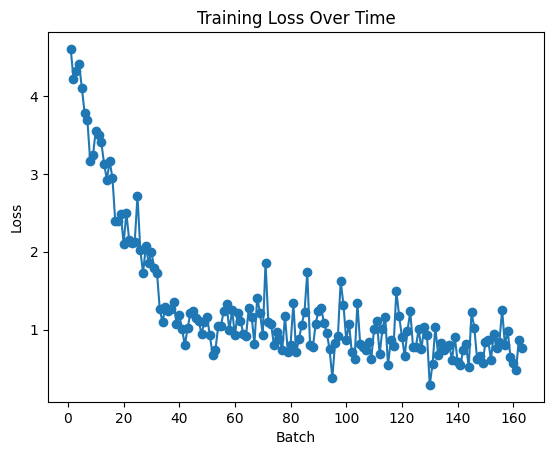

In [76]:
# Load the pre-trained MobileNet model
model = mobilenet_v2(pretrained=True)

# Freeze all the layers
for param in model.parameters():
    param.requires_grad = False

num_classes = 75
model.classifier[1] = nn.Linear(model.classifier[1].in_features, num_classes)

# Unfreeze the last few layers for fine-tuning
for param in model.features[-5:].parameters():
    param.requires_grad = True

# Print the model architecture to verify
# print(model)

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()

# Define the optimizer with momentum
optimizer = optim.Adam(model.parameters(), lr=0.001)


loss_values = []

# Example training loop
num_epochs = 1
for epoch in range(num_epochs):
    model.train()
    for images, labels in train_loader:
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        loss_values.append(loss.item())

    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}")

plt.plot(range(1, len(loss_values) + 1), loss_values, marker='o')
plt.xlabel('Batch')
plt.ylabel('Loss')
plt.title('Training Loss Over Time')
plt.show()

In [77]:
# Model evaluation
model.eval()
tp_tn_fp_fn = torch.zeros(4, num_classes)
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    print(f"Validation accuracy: {(100 * correct / total):.4f}%")

Validation accuracy: 77.0416%


In [78]:
# Save the model to disk
torch.save(model.state_dict(), "butterfly_model.pth")